**RQ1: How much does the inflation rate influence the size and performance of the model?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *

settings_dict = {'': 'name', 'inflate': 'config.p_inflate', 'ms': 'config.ms_upper'}
ana = Analysis('RQ1_newdata', settings_dict)

Visualization for the Median Test Error (RMSE) of the Final Individual for different Inflation Rates

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

0.1 SLIM*SIG1
                   0.1       0.3       0.5       0.9
dataset_name                                        
auction       0.326156  0.308218  0.301756  0.293529
autism        0.423133  0.386425  0.351998  0.335685
biomed        0.500000  0.460000  0.445421  0.444383
caesarian     0.500000  0.500000  0.500000  0.500000
credit        0.401272  0.402043  0.403497  0.403585
darwin        0.494629  0.481150  0.477425  0.469740
facebook      0.161939  0.158146  0.155732  0.156131
landmines     0.404775  0.385159  0.372594  0.363782
student       0.434667  0.401112  0.369005  0.353826
thyroid       0.349069  0.338568  0.314582  0.309307
0.5 SLIM*SIG1
                   0.1       0.3       0.5       0.9
dataset_name                                        
auction       0.315616  0.297149  0.288207  0.278012
autism        0.411106  0.323365  0.285452  0.279384
biomed        0.467530  0.431839  0.445772  0.437248
caesarian     0.500000  0.512522  0.501050  0.514601
credit        0.40

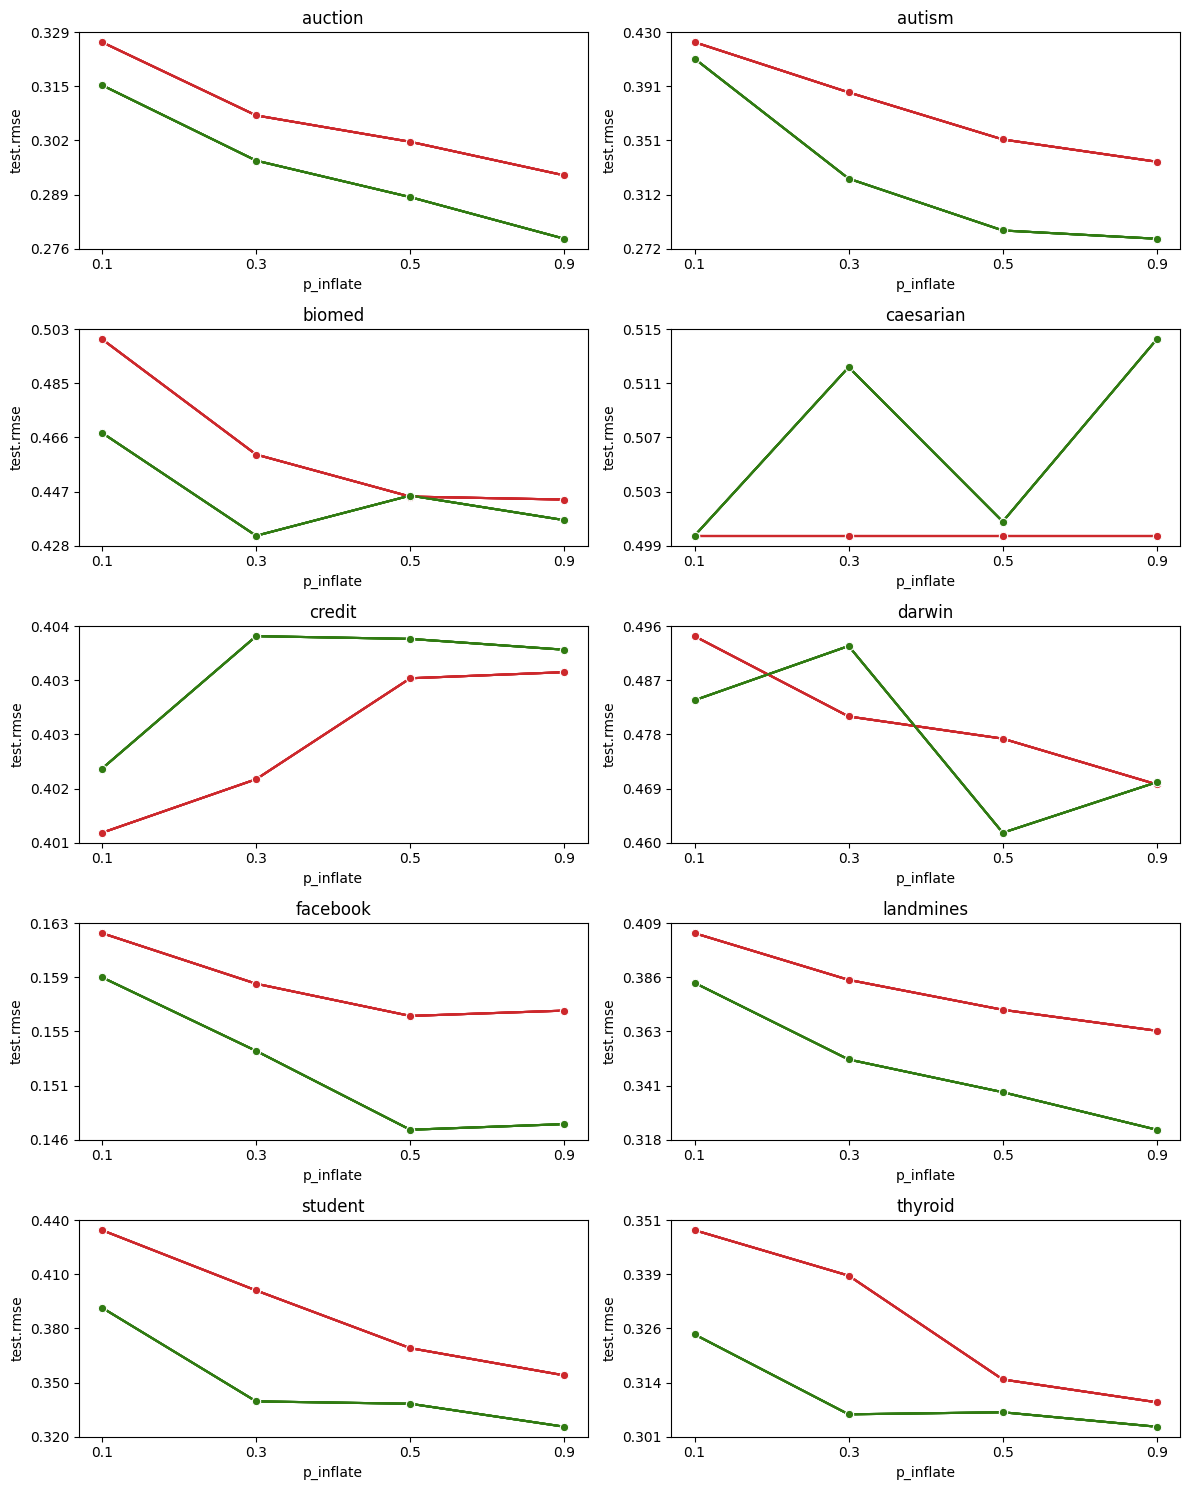

In [2]:
plot_by_p_inflate2(ana.results, 'test.rmse') #[ana.results['config.ms_upper'] == 5]

In [3]:
ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,0.326156,0.315616,0.307134,0.308192,0.308218,0.297149,0.291818,0.292860,0.301756,0.288207,...,0.282798,0.264464,0.309578,0.271726,0.258054,0.240905,0.304089,0.250241,0.233778,0.230409
autism,0.423133,0.411106,0.375506,0.350450,0.386425,0.323365,0.324393,0.347226,0.351998,0.285452,...,0.195437,0.150370,0.278964,0.163996,0.128311,0.101028,0.239036,0.132330,0.108000,0.098954
biomed,0.500000,0.467530,0.457606,0.419382,0.460000,0.431839,0.445883,0.468363,0.445421,0.445772,...,0.454682,0.471375,0.487707,0.386046,0.386015,0.403244,0.487799,0.371584,0.351060,0.344943
caesarian,0.500000,0.500000,0.503259,0.553175,0.500000,0.512522,0.516046,0.513266,0.500000,0.501050,...,0.509031,0.531027,0.512395,0.510510,0.523121,0.532172,0.517771,0.509417,0.544228,0.557211
credit,0.401272,0.402196,0.402286,0.402543,0.402043,0.404103,0.403685,0.408375,0.403497,0.404064,...,0.404038,0.402613,0.402645,0.405036,0.405187,0.402678,0.404691,0.404011,0.405534,0.408123
darwin,0.494629,0.483871,0.489660,0.470245,0.481150,0.492978,0.461126,0.502110,0.477425,0.461627,...,0.398146,0.474337,0.414171,0.396429,0.412932,0.502312,0.393524,0.415689,0.427424,0.517169
facebook,0.161939,0.158626,0.161180,0.141780,0.158146,0.153108,0.119238,0.141065,0.155732,0.147196,...,0.148129,0.136865,0.156882,0.134965,0.139907,0.141315,0.158370,0.131062,0.135876,0.141421
landmines,0.404775,0.383919,0.371893,0.395820,0.385159,0.351717,0.347088,0.342419,0.372594,0.337980,...,0.367871,0.368467,0.375591,0.362955,0.356363,0.353155,0.368961,0.362953,0.352982,0.349134
student,0.434667,0.391492,0.385738,0.342977,0.401112,0.339359,0.339393,0.336458,0.369005,0.338039,...,0.264564,0.269795,0.340852,0.232421,0.224162,0.164350,0.315486,0.240656,0.233841,0.226010


In [4]:
import pandas as pd
import re

def reshape_df(df):
    # Drop or reset index so 'dataset_name' is a column
    df = df.reset_index()

    # Extract all relevant columns
    config_cols = df.columns.difference(['dataset_name'])

    # Build MultiIndex from column names
    new_cols = []
    for col in config_cols:
        match = re.match(r'(.+)_inflate([\d.]+)_ms([\d.]+)_', col)
        if match:
            name, p_inflate, ms_upper = match.groups()
            new_cols.append((name, float(p_inflate), float(ms_upper)))
        else:
            raise ValueError(f"Column format unexpected: {col}")

    # Reassign MultiIndex to the config columns
    df_configs = df[config_cols]
    df_configs.columns = pd.MultiIndex.from_tuples(new_cols, names=["name", "p_inflate", "ms_upper"])

    # Add the dataset_name back as an index or column
    df_configs.insert(0, 'dataset_name', df['dataset_name'])

    # Set index if needed
    df_configs.set_index('dataset_name', inplace=True)

    return df_configs

reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack())

name         SLIM*SIG1                                                    \
p_inflate          0.1                                     0.3             
ms_upper           0.1       0.5       1.0       5.0       0.1       0.5   
dataset_name                                                               
auction       0.326156  0.315616  0.307134  0.308192  0.308218  0.297149   
autism        0.423133  0.411106  0.375506  0.350450  0.386425  0.323365   
biomed        0.500000  0.467530  0.457606  0.419382  0.460000  0.431839   
caesarian     0.500000  0.500000  0.503259  0.553175  0.500000  0.512522   
credit        0.401272  0.402196  0.402286  0.402543  0.402043  0.404103   
darwin        0.494629  0.483871  0.489660  0.470245  0.481150  0.492978   
facebook      0.161939  0.158626  0.161180  0.141780  0.158146  0.153108   
landmines     0.404775  0.383919  0.371893  0.395820  0.385159  0.351717   
student       0.434667  0.391492  0.385738  0.342977  0.401112  0.339359   
thyroid       0.349069  0.324995  0.317641  0.305757  0.338568  0.306529   

name                                                  ... SLIM+SIG1            \
p_inflate                              0.5            ...       0.3             
ms_upper           1.0       5.0       0.1       0.5  ...       1.0       5.0   
dataset_name                                          ...                       
auction       0.291818  0.292860  0.301756  0.288207  ...  0.282798  0.264464   
autism        0.324393  0.347226  0.351998  0.285452  ...  0.195437  0.150370   
biomed        0.445883  0.468363  0.445421  0.445772  ...  0.454682  0.471375   
caesarian     0.516046  0.513266  0.500000  0.501050  ...  0.509031  0.531027   
credit        0.403685  0.408375  0.403497  0.404064  ...  0.404038  0.402613   
darwin        0.461126  0.502110  0.477425  0.461627  ...  0.398146  0.474337   
facebook      0.119238  0.141065  0.155732  0.147196  ...  0.148129  0.136865   
landmines     0.347088  0.342419  0.372594  0.337980  ...  0.367871  0.368467   
student       0.339393  0.336458  0.369005  0.338039  ...  0.264564  0.269795   
thyroid       0.310467  0.309251  0.314582  0.307004  ...  0.164543  0.186251   

name                                                                      \
p_inflate          0.5                                     0.9             
ms_upper           0.1       0.5       1.0       5.0       0.1       0.5   
dataset_name                                                               
auction       0.309578  0.271726  0.258054  0.240905  0.304089  0.250241   
autism        0.278964  0.163996  0.128311  0.101028  0.239036  0.132330   
biomed        0.487707  0.386046  0.386015  0.403244  0.487799  0.371584   
caesarian     0.512395  0.510510  0.523121  0.532172  0.517771  0.509417   
credit        0.402645  0.405036  0.405187  0.402678  0.404691  0.404011   
darwin        0.414171  0.396429  0.412932  0.502312  0.393524  0.415689   
facebook      0.156882  0.134965  0.139907  0.141315  0.158370  0.131062   
landmines     0.375591  0.362955  0.356363  0.353155  0.368961  0.362953   
student       0.340852  0.232421  0.224162  0.164350  0.315486  0.240656   
thyroid       0.228650  0.160331  0.166806  0.193006  0.181622  0.164311   

name                              
p_inflate                         
ms_upper           1.0       5.0  
dataset_name                      
auction       0.233778  0.230409  
autism        0.108000  0.098954  
biomed        0.351060  0.344943  
caesarian     0.544228  0.557211  
credit        0.405534  0.408123  
darwin        0.427424  0.517169  
facebook      0.135876  0.141421  
landmines     0.352982  0.349134  
student       0.233841  0.226010  
thyroid       0.162066  0.174093  

[10 rows x 32 columns]

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

def plot_by_p_inflate_with_ms(df_reshaped, metric_name='metric', colors_dict=None):
    # Convert wide MultiIndex df to long-form
    df_long = df_reshaped.stack(level=[0, 1, 2]).reset_index()
    df_long.columns = ['dataset_name', 'name', 'p_inflate', 'ms_upper', metric_name]

    # Sort values to ensure lines connect properly
    df_long = df_long.sort_values(by=['dataset_name', 'name', 'ms_upper', 'p_inflate'])

    # Get unique datasets for subplots
    unique_datasets = df_long['dataset_name'].unique()
    fig, ax = plt.subplots(int(len(unique_datasets) / 2) + len(unique_datasets) % 2, 2,
                           figsize=(12, 15), squeeze=False)

    i = j = 0
    for dataset in unique_datasets:
        data_subset = df_long[df_long['dataset_name'] == dataset]

        sns.lineplot(
            data=data_subset,
            x='p_inflate',
            y=metric_name,
            hue='ms_upper',
            style='name',
            markers=True,
            dashes=True,
            palette = 'Set1',
            #palette=colors_dict,
            ax=ax[i, j]
        )

        ax[i, j].set_title(f'{dataset}')
        ax[i, j].set_xlabel('p_inflate')
        ax[i, j].set_ylabel(metric_name)
        ax[i, j].yaxis.set_major_locator(ticker.LinearLocator(5))
        if metric_name == 'nodes_count':
            ax[i, j].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))
        else:
            ax[i, j].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.3f}"))

        j = (j + 1) % 2
        i = i + 1 if j == 0 else i

    fig.tight_layout()
    plt.show()


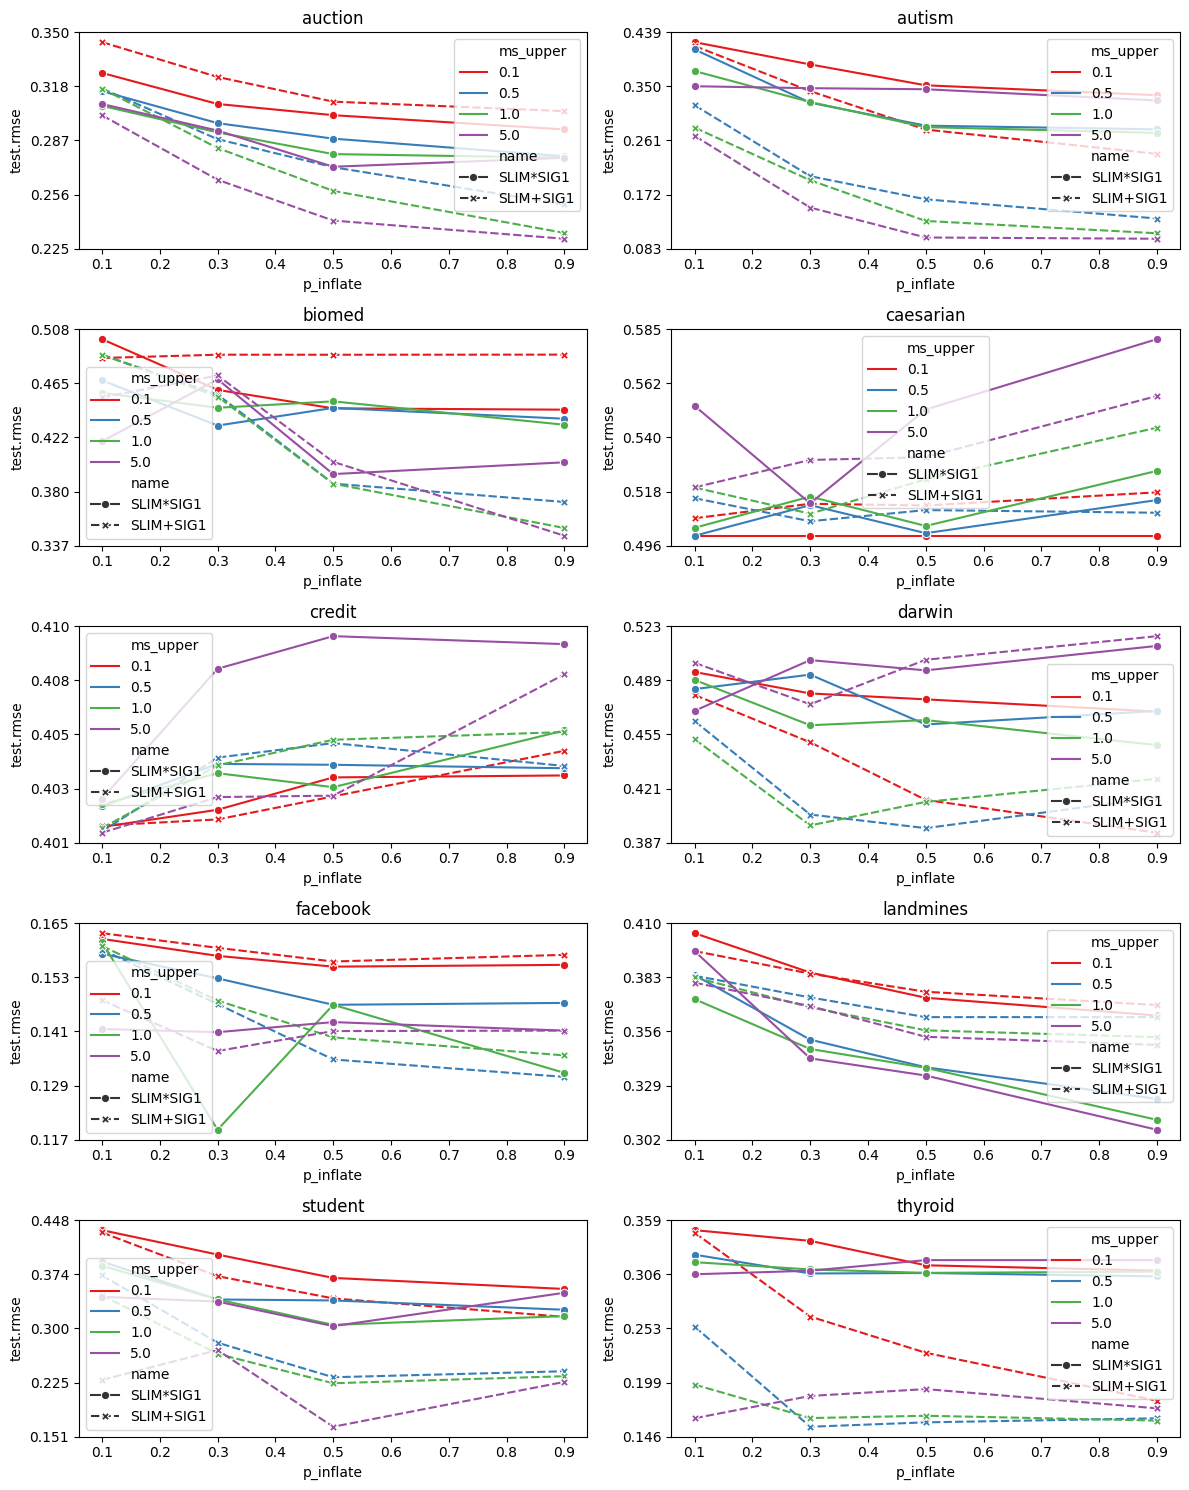

In [82]:
plot_by_p_inflate_with_ms(reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()), 'test.rmse', colors_dict)

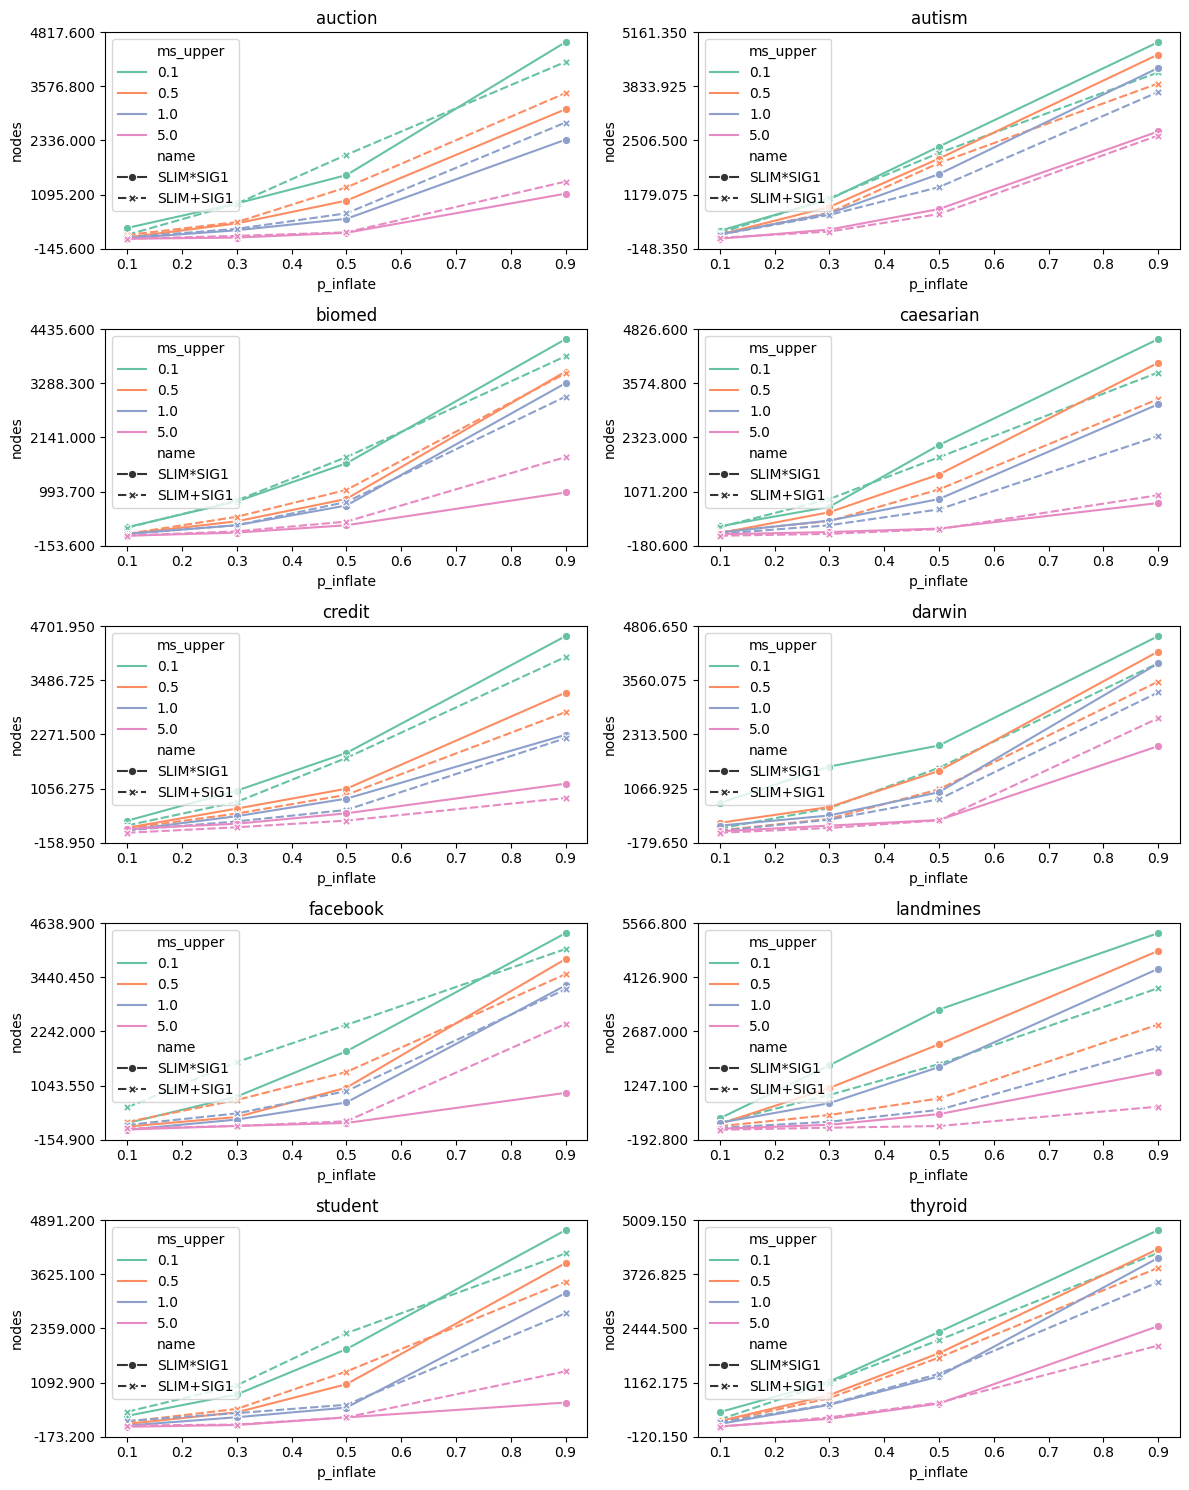

In [24]:
plot_by_p_inflate_with_ms(reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['nodes_count'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()), 'nodes', colors_dict)

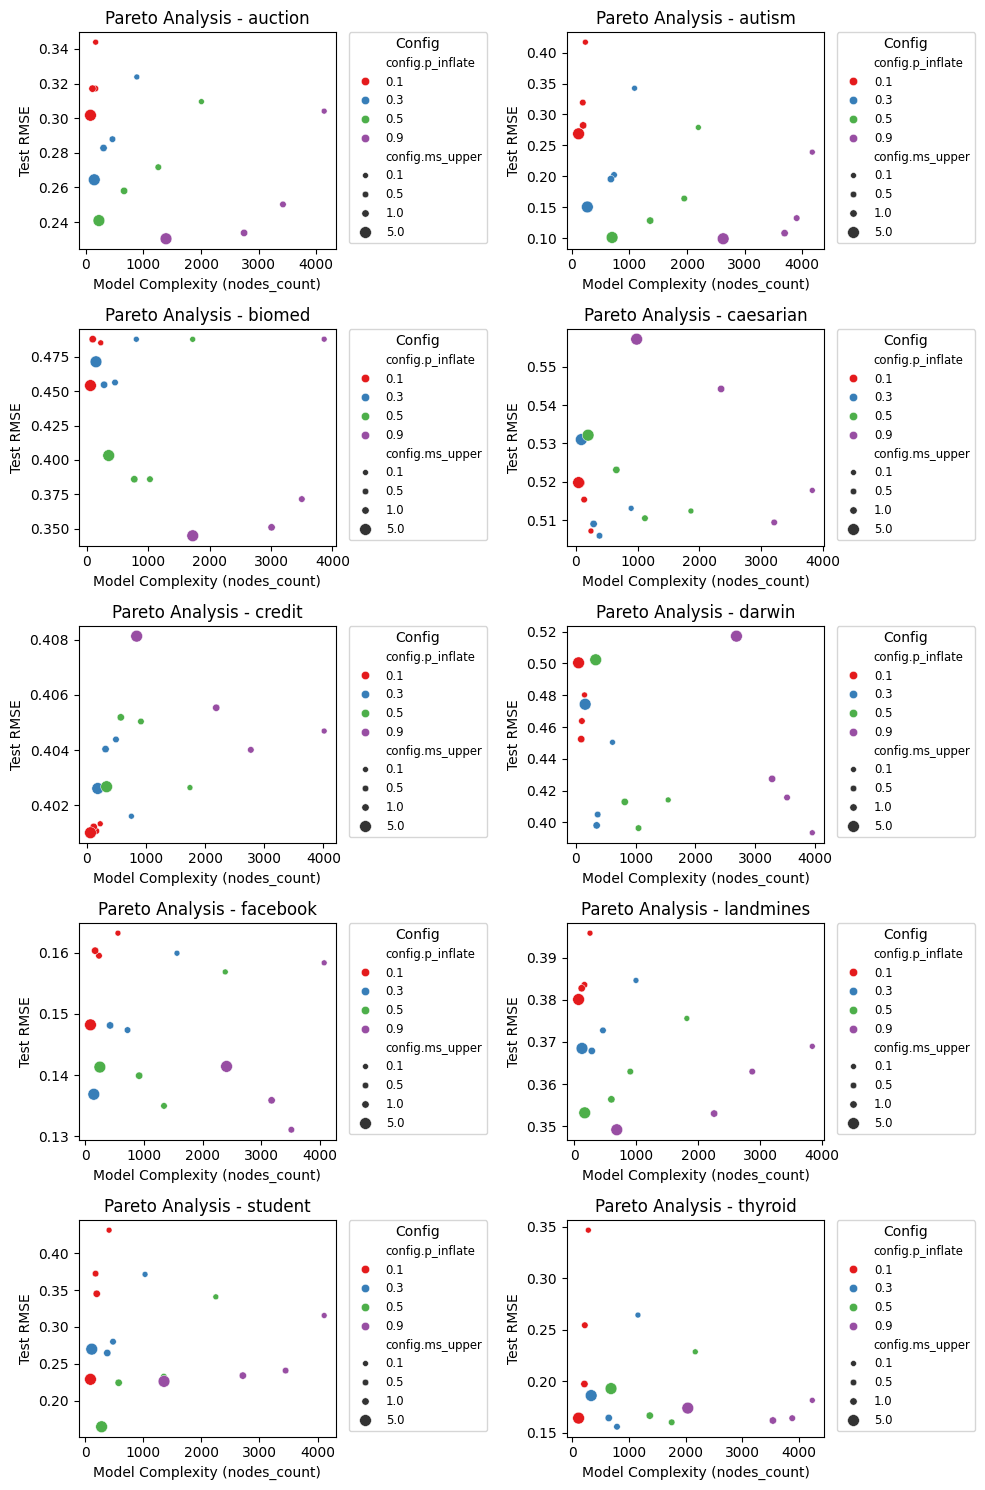

In [78]:
df = ana.results.groupby(['dataset_name', 'config_settings', 'name', 'config.p_inflate', 'config.ms_upper'])[['nodes_count', 'test.rmse']].median().reset_index(drop=False)
import math

# Get unique datasets
datasets = df['dataset_name'].unique()
n = len(datasets)

# Create subplots (2 per row)
fig, axes = plt.subplots(math.ceil(n/2), 2, figsize=(10, 3 * math.ceil(n/2)))
axes = axes.flatten()
for i, dataset in enumerate(datasets):
    subset = df[df['dataset_name'] == dataset]
    subset = subset[subset['name'] == 'SLIM+SIG1']
    ax = axes[i]
    sns.scatterplot(
        data=subset,
        x='nodes_count',
        y='test.rmse',
        hue='config.p_inflate',
        #size= 'config.p_inflate',
        size= 'config.ms_upper',
        palette = 'Set1',
        ax=ax
    )
    
    ax.set_title(f"Pareto Analysis - {dataset}")
    ax.set_xlabel("Model Complexity (nodes_count)")
    ax.set_ylabel("Test RMSE")
    ax.legend(loc='best', fontsize='small', title='Config', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



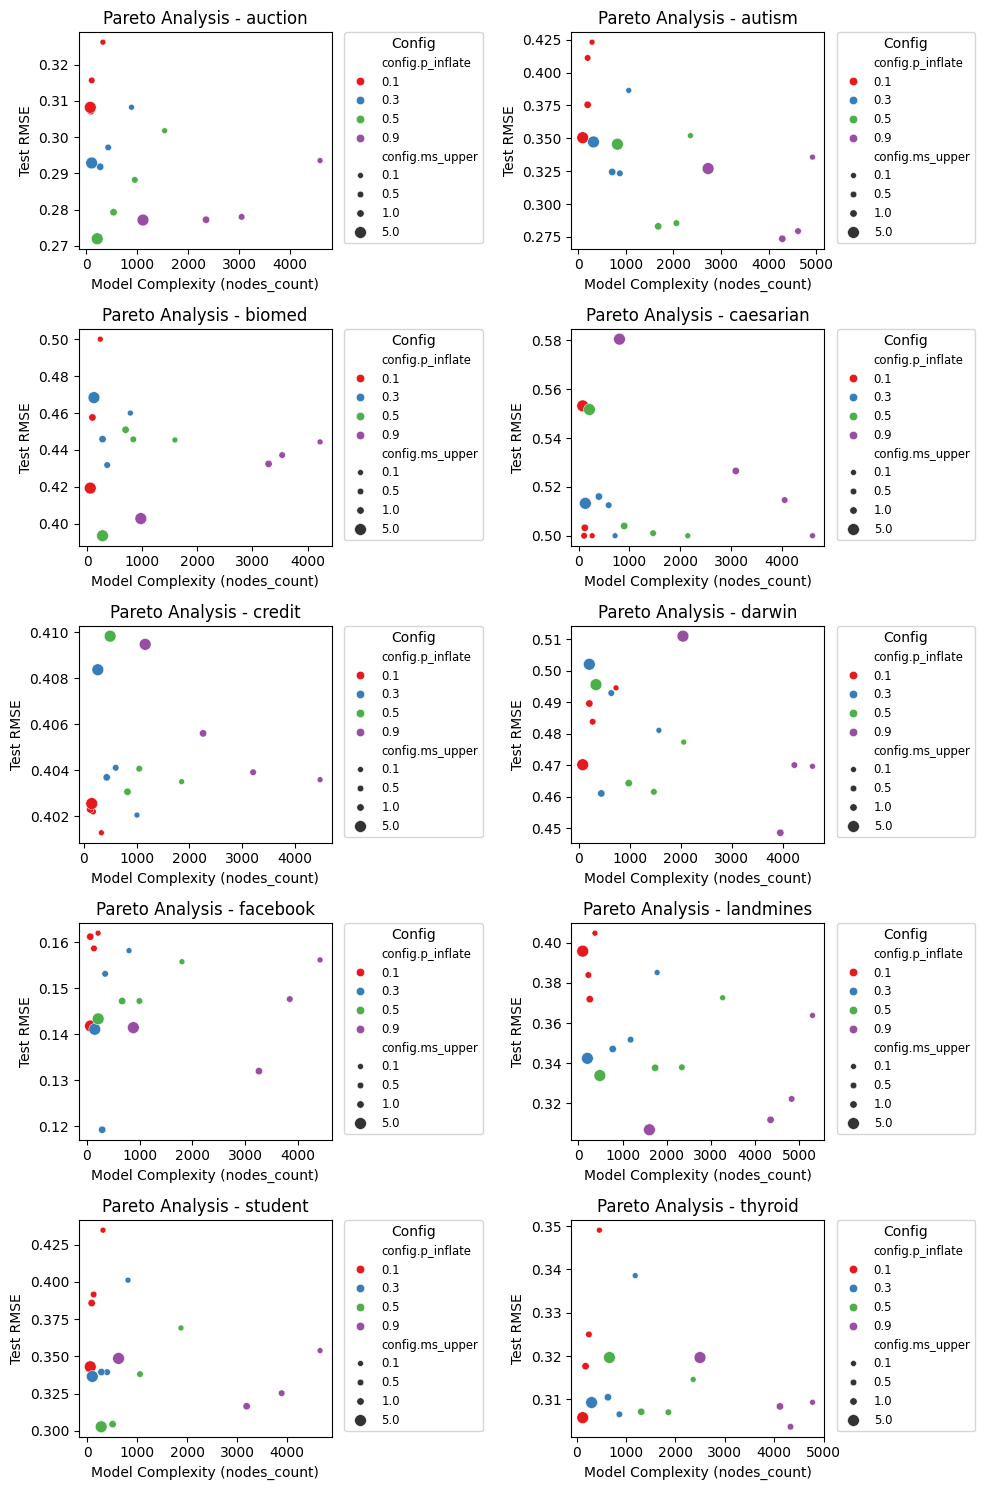

In [83]:
df = ana.results.groupby(['dataset_name', 'config_settings', 'name', 'config.p_inflate', 'config.ms_upper'])[['nodes_count', 'test.rmse']].median().reset_index(drop=False)
import math

# Get unique datasets
datasets = df['dataset_name'].unique()
n = len(datasets)

# Create subplots (2 per row)
fig, axes = plt.subplots(math.ceil(n/2), 2, figsize=(10, 3 * math.ceil(n/2)))
axes = axes.flatten()
for i, dataset in enumerate(datasets):
    subset = df[df['dataset_name'] == dataset]
    subset = subset[subset['name'] == 'SLIM*SIG1']
    ax = axes[i]
    sns.scatterplot(
        data=subset,
        x='nodes_count',
        y='test.rmse',
        hue='config.p_inflate',
        #size= 'config.p_inflate',
        size= 'config.ms_upper',
        palette = 'Set1',
        ax=ax
    )
    
    ax.set_title(f"Pareto Analysis - {dataset}")
    ax.set_xlabel("Model Complexity (nodes_count)")
    ax.set_ylabel("Test RMSE")
    ax.legend(loc='best', fontsize='small', title='Config', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [69]:
import numpy as np
import pandas as pd

def pareto_optimal(df, cols_to_minimize):
    data = df[cols_to_minimize].values
    is_pareto = np.ones(data.shape[0], dtype=bool)
    
    for i, point in enumerate(data):
        if is_pareto[i]:
            # Remove points that are dominated by point[i]
            is_pareto[is_pareto] = np.any(data[is_pareto] < point, axis=1) | np.all(data[is_pareto] == point, axis=1)
            is_pareto[i] = True  # Keep current point
    
    return df[is_pareto].reset_index(drop=True)

# Example usage:
pareto_df = pareto_optimal(df[df['dataset_name']=='autism'], ['test.rmse', 'nodes_count'])
print(pareto_df)


  dataset_name              config_settings       name  config.p_inflate  \
0       autism  SLIM*SIG1_inflate0.1_ms5.0_  SLIM*SIG1               0.1   
1       autism  SLIM+SIG1_inflate0.1_ms5.0_  SLIM+SIG1               0.1   
2       autism  SLIM+SIG1_inflate0.3_ms5.0_  SLIM+SIG1               0.3   
3       autism  SLIM+SIG1_inflate0.5_ms5.0_  SLIM+SIG1               0.5   
4       autism  SLIM+SIG1_inflate0.9_ms5.0_  SLIM+SIG1               0.9   

   config.ms_upper  nodes_count  test.rmse  
0              5.0         93.0   0.350450  
1              5.0        117.0   0.268686  
2              5.0        269.0   0.150370  
3              5.0        699.0   0.101028  
4              5.0       2628.0   0.098954  


In [9]:
a = ana.results[['config_id', 'config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']].drop_duplicates().reset_index(drop=True)
ana.logs['config_id'] = ana.logs['config_id'].astype(int)
df = pd.merge(
    ana.logs[['config_id', 'elite_nodes', 'generation']],
    a,
    on='config_id',
    how='right'
)

df['gen*p_inflate'] = df['config.p_inflate']  * df['generation']
df.drop(columns=['config_id'], inplace=True)
df = pd.get_dummies(df, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = df.drop(columns=['elite_nodes', 'config.p_inflate', 'generation'])

y = df['elite_nodes']


lr = LinearRegression()
lr.fit(X, y)
print(r2_score(y, lr.predict(X)))
lr.coef_, lr.intercept_

0.7540696802366


(array([-1.11221482e+02,  6.75778400e+00, -2.38147002e-12, -2.35143849e-12,
        -2.31598074e-12, -2.37616871e-12, -2.35675368e-12, -2.34519348e-12,
        -2.34622044e-12, -2.35500508e-12, -2.35100828e-12, -6.48532698e+01]),
 127.96579076130251)

In [10]:
X = ana.results[['config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']]
X = pd.get_dummies(X, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)
y = ana.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

0.773092758426989

In [11]:
lr.coef_, lr.intercept_

(array([3718.96964286, -221.1308149 ,  505.3       , -140.4375    ,
          43.41875   ,  -20.55625   ,  254.4375    ,  -34.0125    ,
         287.1625    ,   68.83125   ,  449.0375    , -130.08625   ]),
 -147.57111970210258)

Median Test Errors (RMSE) Table

In [12]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,328.0,109.0,93.0,80.0,890.0,432.0,275.0,107.0,1540.0,955.0,...,307.0,146.0,2007.0,1258.0,664.0,227.0,4139.0,3423.0,2748.0,1392.0
autism,289.0,197.0,197.0,93.0,1060.0,873.0,713.0,319.0,2356.0,2061.0,...,678.0,269.0,2197.0,1952.0,1360.0,699.0,4176.0,3905.0,3695.0,2628.0
biomed,237.0,94.0,94.0,55.0,783.0,362.0,278.0,122.0,1592.0,836.0,...,280.0,148.0,1723.0,1027.0,772.0,355.0,3865.0,3501.0,3008.0,1724.0
caesarian,267.0,109.0,122.0,81.0,717.0,592.0,399.0,133.0,2147.0,1465.0,...,290.0,91.0,1864.0,1120.0,658.0,201.0,3827.0,3211.0,2352.0,986.0
credit,332.0,174.0,122.0,150.0,1008.0,605.0,434.0,265.0,1855.0,1051.0,...,317.0,185.0,1744.0,915.0,575.0,335.0,4013.0,2773.0,2188.0,843.0
darwin,733.0,276.0,211.0,81.0,1573.0,640.0,445.0,211.0,2059.0,1474.0,...,349.0,157.0,1545.0,1049.0,819.0,333.0,3954.0,3532.0,3282.0,2686.0
facebook,211.0,133.0,63.0,68.0,798.0,345.0,289.0,148.0,1802.0,995.0,...,425.0,148.0,2386.0,1343.0,920.0,251.0,4070.0,3511.0,3175.0,2408.0
landmines,373.0,224.0,256.0,96.0,1783.0,1181.0,776.0,202.0,3268.0,2344.0,...,282.0,124.0,1816.0,903.0,598.0,168.0,3840.0,2871.0,2256.0,685.0
student,312.0,124.0,85.0,57.0,813.0,395.0,280.0,98.0,1874.0,1053.0,...,376.0,108.0,2247.0,1350.0,572.0,278.0,4115.0,3450.0,2713.0,1354.0


P-Values for the ANOVA Test comparing the performance of different Inflation Rates for each SLIM-Version

In [13]:
get_anova_table(ana.results, 'test.rmse')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,4.641983e-11,4.853233e-11
autism,4.469186e-01,2.082317e-09
biomed,5.533432e-01,5.984792e-03
caesarian,8.530047e-01,8.740171e-01
credit,7.080252e-01,4.317246e-01
darwin,5.585435e-01,7.505635e-03
facebook,4.322860e-01,9.710876e-01
landmines,2.080152e-10,1.438810e-04
student,2.425804e-01,1.589840e-05


P-Values when excluding the Corner Values [0.1, 0.9] from the ANOVA Test

In [14]:
get_anova_table(ana.results.loc[ana.results['config.p_inflate'].isin([0.3, 0.5, 0.7])], 'test.rmse')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.001754,0.018330
autism,0.838818,0.109952
biomed,0.493315,0.139655
caesarian,0.943190,0.722714
credit,0.910465,0.754382
darwin,0.137366,0.717290
facebook,0.636660,0.694887
landmines,0.031395,0.158601
student,0.507252,0.080934


Countplot for the Sum of best achieved Performance for the different Inflation Rates accross Datasets

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

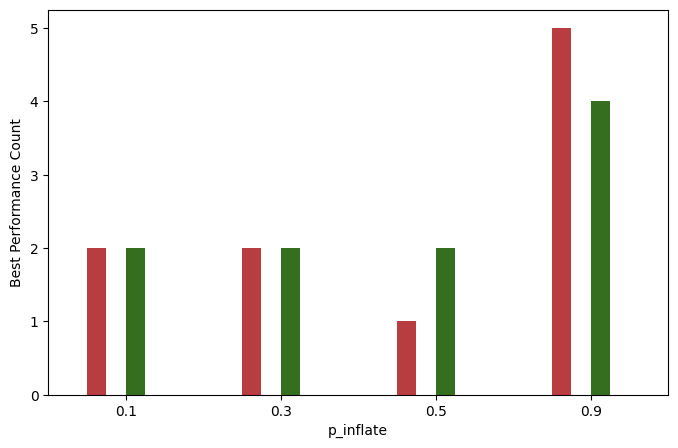

In [15]:
plot_countplot(ana.results, 'test.rmse')

Visualization for the Median Tree Size of the Final Individual for different Inflation Rates

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

             SLIM*SIG1                                                     \
dataset_name   auction  autism  biomed caesarian  credit  darwin facebook   
0.1              328.0   289.0   237.0     267.0   332.0   733.0    211.0   
0.1              109.0   197.0    94.0     109.0   174.0   276.0    133.0   
0.1               93.0   197.0    94.0     122.0   122.0   211.0     63.0   
0.1               80.0    93.0    55.0      81.0   150.0    81.0     68.0   
0.3              890.0  1060.0   783.0     717.0  1008.0  1573.0    798.0   
0.3              432.0   873.0   362.0     592.0   605.0   640.0    345.0   
0.3              275.0   713.0   278.0     399.0   434.0   445.0    289.0   
0.3              107.0   319.0   122.0     133.0   265.0   211.0    148.0   
0.5             1540.0  2356.0  1592.0    2147.0  1855.0  2059.0   1802.0   
0.5              955.0  2061.0   836.0    1465.0  1051.0  1474.0    995.0   
0.5              537.0  1679.0   696.0     897.0   828.0   982.0    668.0   

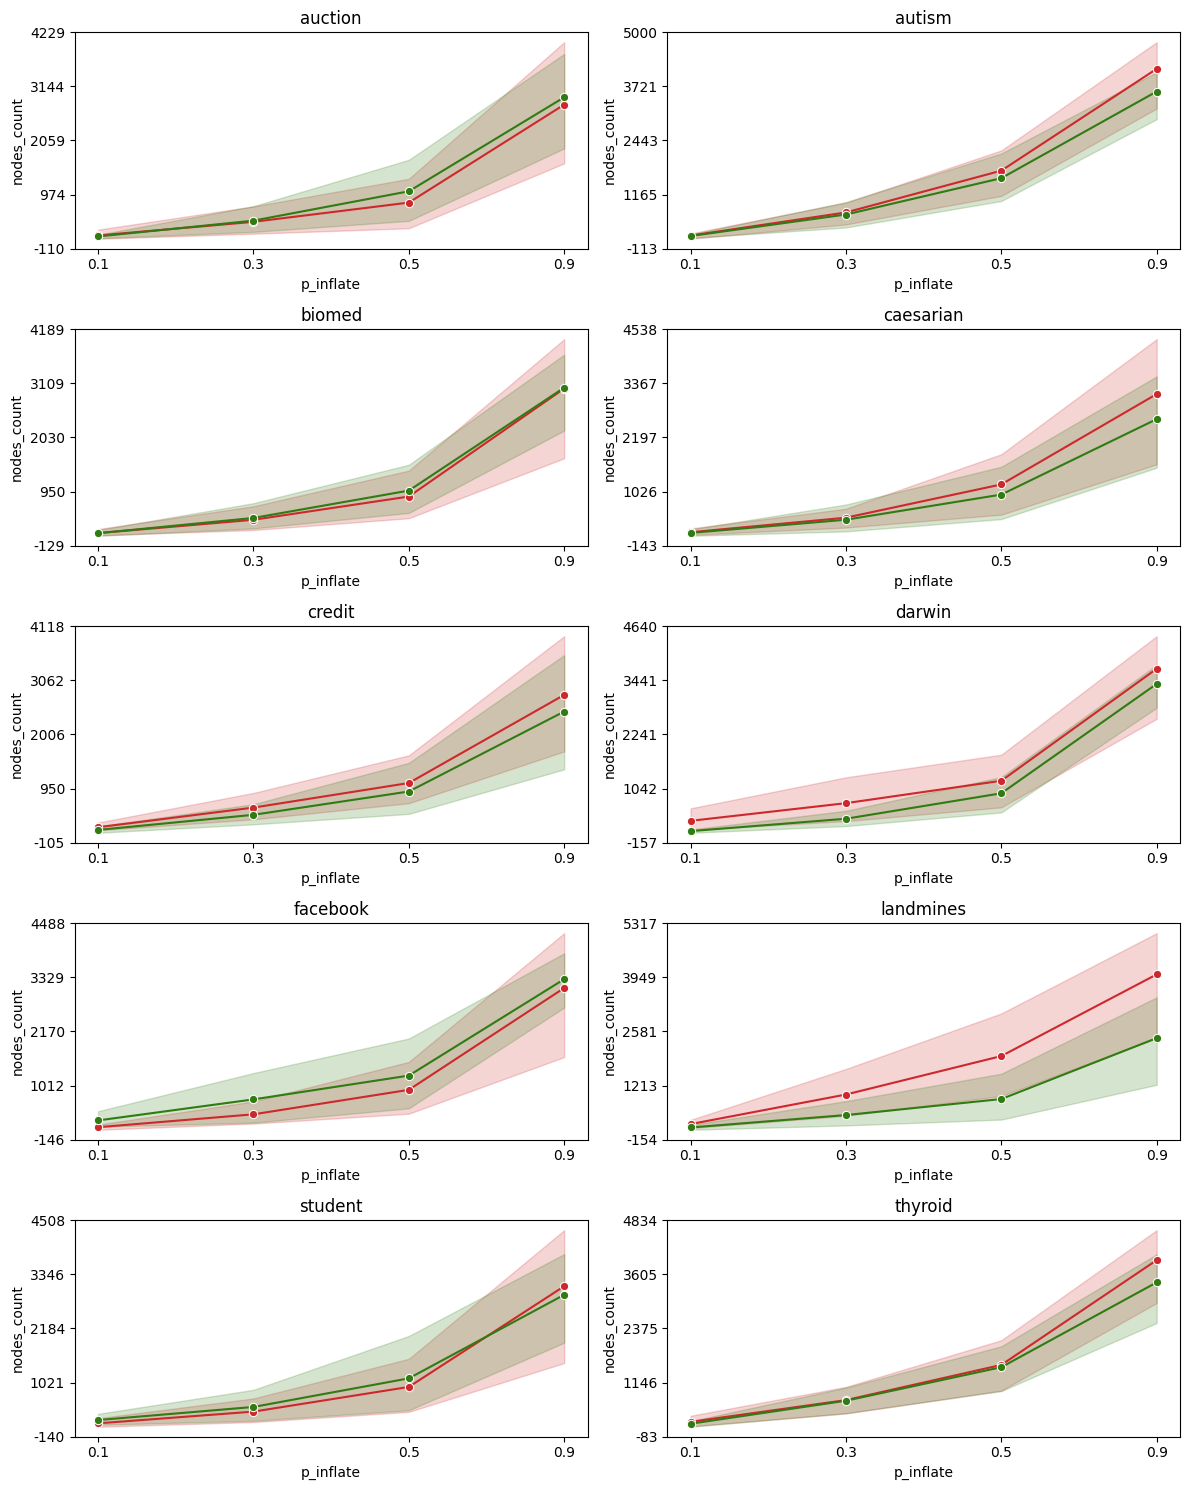

In [16]:
plot_by_p_inflate(ana.results, 'nodes_count') #[ana.results['config.ms_upper']==5]

Median Tree Size Table

In [17]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,328.0,109.0,93.0,80.0,890.0,432.0,275.0,107.0,1540.0,955.0,...,307.0,146.0,2007.0,1258.0,664.0,227.0,4139.0,3423.0,2748.0,1392.0
autism,289.0,197.0,197.0,93.0,1060.0,873.0,713.0,319.0,2356.0,2061.0,...,678.0,269.0,2197.0,1952.0,1360.0,699.0,4176.0,3905.0,3695.0,2628.0
biomed,237.0,94.0,94.0,55.0,783.0,362.0,278.0,122.0,1592.0,836.0,...,280.0,148.0,1723.0,1027.0,772.0,355.0,3865.0,3501.0,3008.0,1724.0
caesarian,267.0,109.0,122.0,81.0,717.0,592.0,399.0,133.0,2147.0,1465.0,...,290.0,91.0,1864.0,1120.0,658.0,201.0,3827.0,3211.0,2352.0,986.0
credit,332.0,174.0,122.0,150.0,1008.0,605.0,434.0,265.0,1855.0,1051.0,...,317.0,185.0,1744.0,915.0,575.0,335.0,4013.0,2773.0,2188.0,843.0
darwin,733.0,276.0,211.0,81.0,1573.0,640.0,445.0,211.0,2059.0,1474.0,...,349.0,157.0,1545.0,1049.0,819.0,333.0,3954.0,3532.0,3282.0,2686.0
facebook,211.0,133.0,63.0,68.0,798.0,345.0,289.0,148.0,1802.0,995.0,...,425.0,148.0,2386.0,1343.0,920.0,251.0,4070.0,3511.0,3175.0,2408.0
landmines,373.0,224.0,256.0,96.0,1783.0,1181.0,776.0,202.0,3268.0,2344.0,...,282.0,124.0,1816.0,903.0,598.0,168.0,3840.0,2871.0,2256.0,685.0
student,312.0,124.0,85.0,57.0,813.0,395.0,280.0,98.0,1874.0,1053.0,...,376.0,108.0,2247.0,1350.0,572.0,278.0,4115.0,3450.0,2713.0,1354.0


P-Values for the ANOVA Test comparing the Tree Size of different Inflation Rates for each SLIM-Version

In [18]:
get_anova_table(ana.results, 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,5.979925e-18,1.082121e-22
autism,1.879692e-34,4.236451e-37
biomed,1.601541e-10,3.061488e-23
caesarian,2.959930e-17,4.916322e-19
credit,5.504761e-19,9.416238e-17
darwin,8.928884e-25,1.456714e-46
facebook,9.506388e-15,2.801172e-11
landmines,4.660608e-20,2.617964e-15
student,1.204075e-16,4.044322e-20


P-Values when excluding the Corner Value 0.1 from the ANOVA Test

In [19]:
get_anova_table(ana.results.loc[ana.results['config.p_inflate'].isin([0.3, 0.5, 0.7])], 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.014679,0.002033
autism,0.000001,0.000002
biomed,0.015151,0.003000
caesarian,0.000848,0.002219
credit,0.000782,0.008717
darwin,0.019247,0.000001
facebook,0.006183,0.063294
landmines,0.001234,0.008877
student,0.001197,0.007792
